In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [10]:
!pip install gdown

In [12]:
import pandas as pd

# The file path is simply the name of the file
file_path = 'Clean_Dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows to verify it loaded correctly
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [13]:
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Number of Columns: 12
Number of Rows: 300153


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [16]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  0


EDA

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


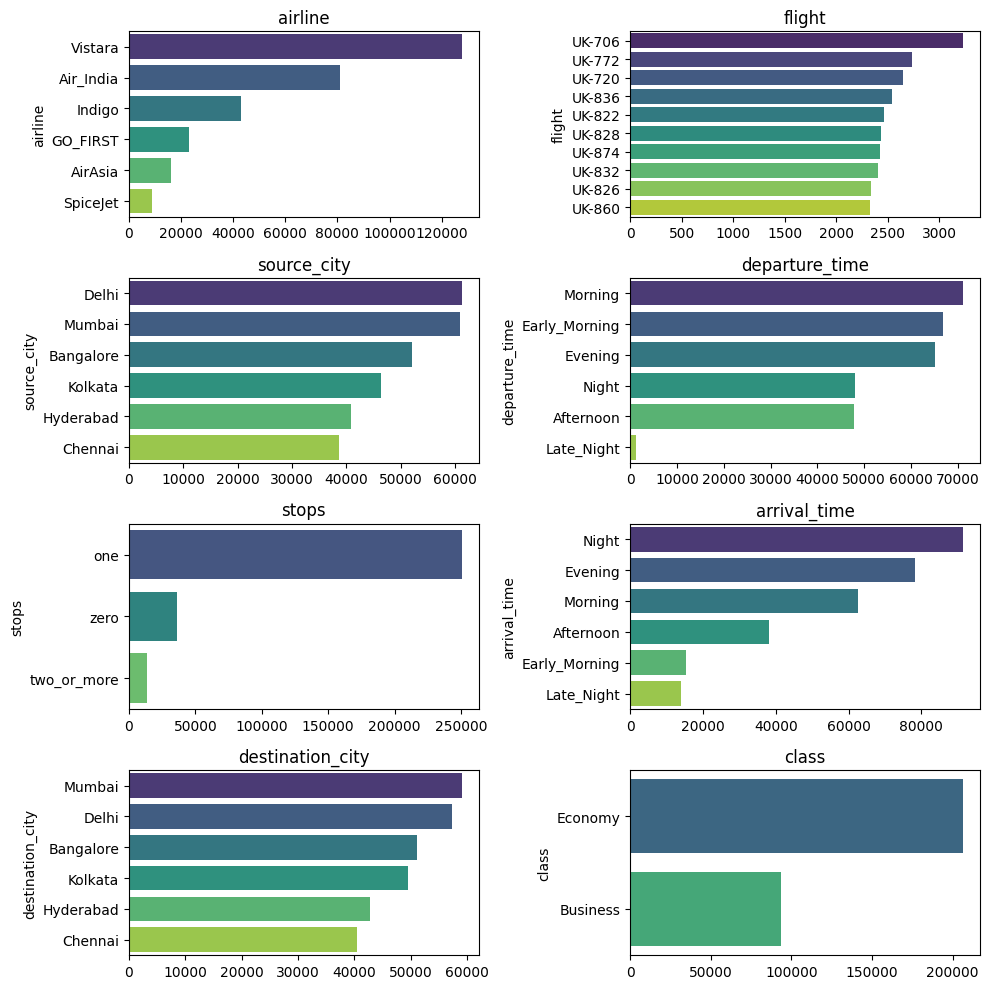

In [18]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(4, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
plt.tight_layout()


Does price vary with Airlines?

In [19]:
economy_df = df[df["class"] == "Economy"]
business_df = df[df["class"] == "Business"]

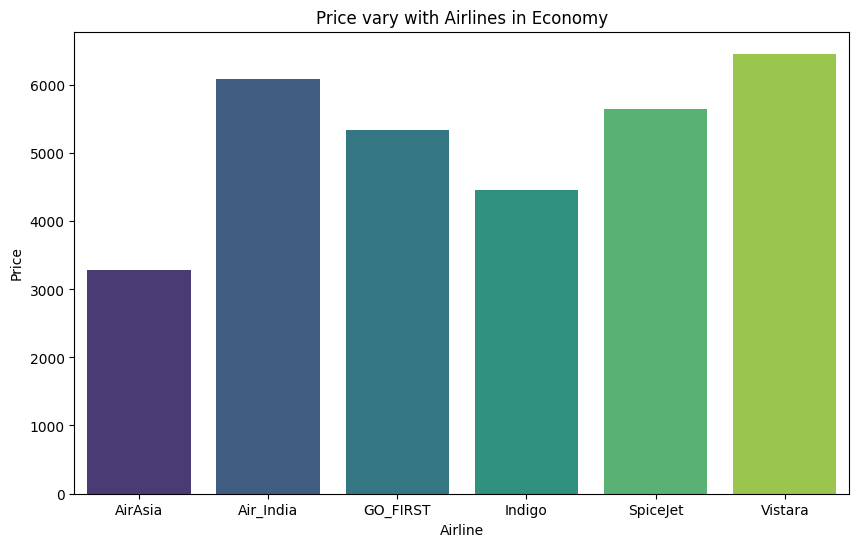

In [21]:
price_in_economy = economy_df.groupby("airline")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_in_economy.index, y=price_in_economy.values, palette="viridis")
plt.title("Price vary with Airlines in Economy")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

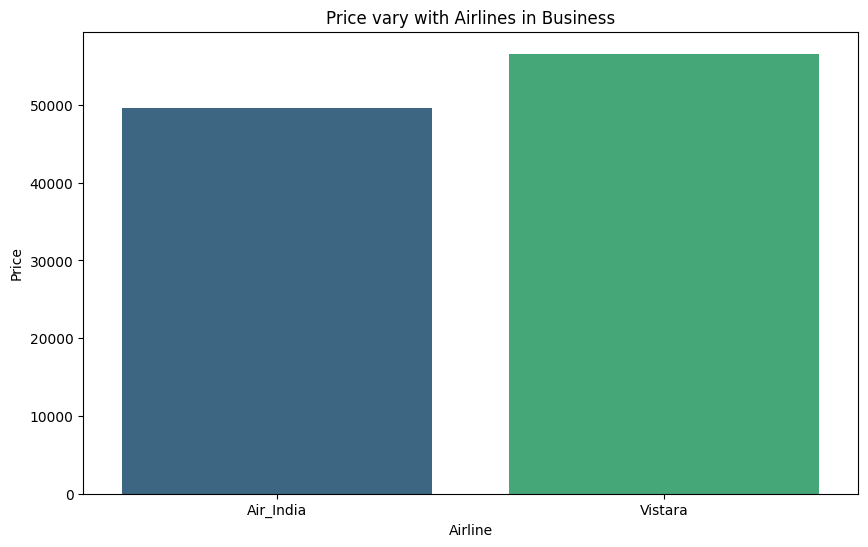

In [22]:
price_in_business = business_df.groupby("airline")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=price_in_business.index, y=price_in_business.values, palette="viridis")
plt.title("Price vary with Airlines in Business")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

Observation✨✨:¶
In the Economy Class:
The cheapest airline is Air Asia and The most expensive airline is Vistara

In the Business Class:
The cheapest airline is Air India and The most expensive airline is Vistara

In general:
The most expensive airline is Vistara and The cheapest airline is Air Asia

How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [23]:
one_day = df[(df["days_left"] == 1) & (df["class"] == "Economy")]["price"].median()
two_days = df[(df["days_left"] == 2) & (df["class"] == "Economy")]["price"].median()

In [24]:
print("The median price when tickets are bought in just 1 day before departure: ", one_day)
print("The median price when tickets are bought in just 2 days before departure: ", two_days)

The median price when tickets are bought in just 1 day before departure:  14150.0
The median price when tickets are bought in just 2 days before departure:  13212.0


Observation✨✨:¶
the tickets price in 2 days left is cheaper than the tickets price in 1 day left

Does ticket price change based on the departure time and arrival time?

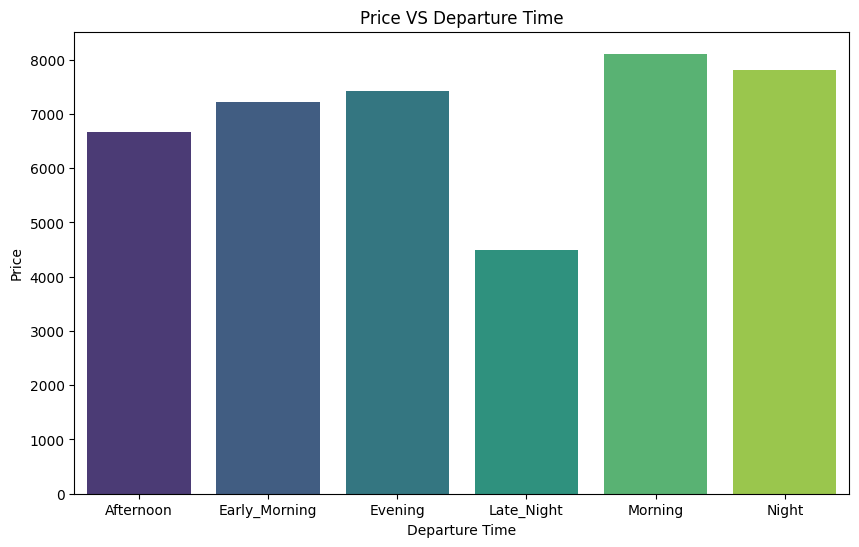

In [25]:
departure_time = df.groupby("departure_time")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=departure_time.index, y=departure_time.values, palette="viridis")
plt.title("Price VS Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

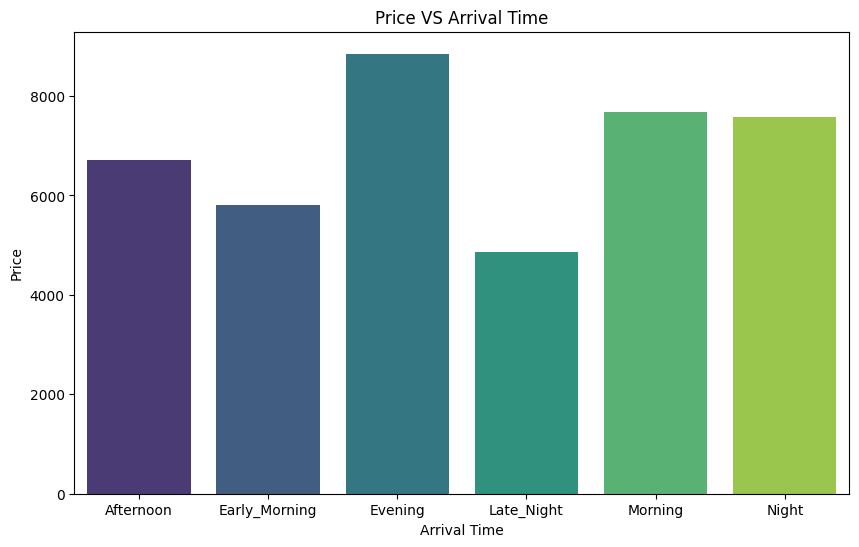

In [26]:
arrival_time = df.groupby("arrival_time")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=arrival_time.index, y=arrival_time.values, palette="viridis")
plt.title("Price VS Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Price")
plt.show()

Observation✨✨:¶
the cheapest time to travel is Late Night

How the price changes with change in Source and Destination?

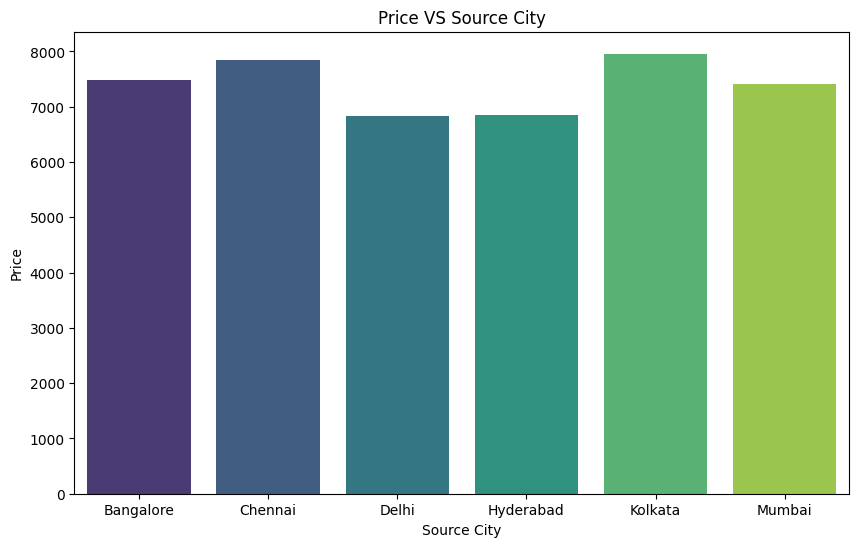

In [27]:
source_city = df.groupby("source_city")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=source_city.index, y=source_city.values, palette="viridis")
plt.title("Price VS Source City")
plt.xlabel("Source City")
plt.ylabel("Price")
plt.show()

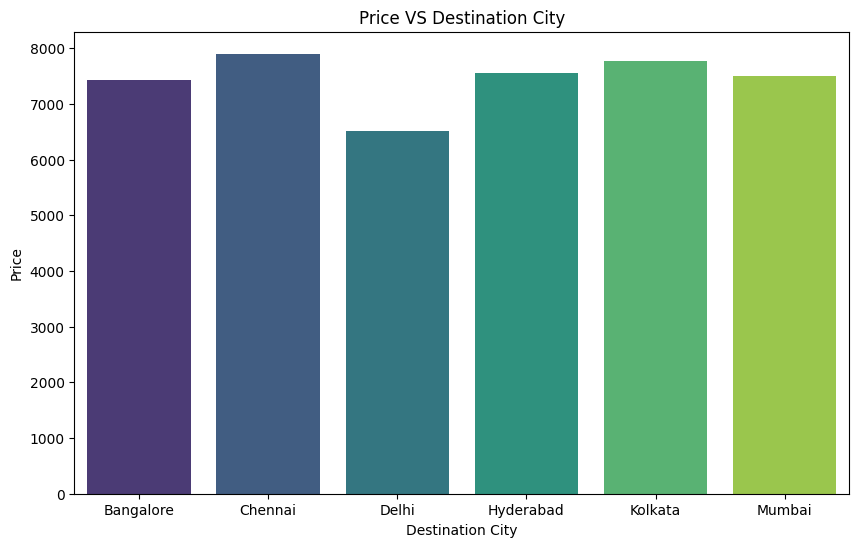

In [28]:
destination_city = df.groupby("destination_city")["price"].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=destination_city.index, y=destination_city.values, palette="viridis")
plt.title("Price VS Destination City")
plt.xlabel("Destination City")
plt.ylabel("Price")
plt.show()

How does the ticket price vary between Economy and Business class?

In [29]:
economy_price = df[df["class"] == "Economy"]["price"].median()
business_price = df[df["class"] == "Business"]["price"].median()

In [30]:
print("The Median Price in Economy: ", economy_price)
print("The Median Price in Business: ", business_price)

The Median Price in Economy:  5772.0
The Median Price in Business:  53164.0


Enoding

In [32]:
encoder = LabelEncoder()

df["airline"] = encoder.fit_transform(df["airline"])
df["source_city"] = encoder.fit_transform(df["source_city"])
df["departure_time"] = encoder.fit_transform(df["departure_time"])
df["stops"] = encoder.fit_transform(df["stops"])
df["arrival_time"] = encoder.fit_transform(df["arrival_time"])
df["destination_city"] = encoder.fit_transform(df["destination_city"])
df["class"] = encoder.fit_transform(df["class"])

In [33]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [34]:
df.drop(["Unnamed: 0", "flight"], axis=1, inplace=True)

Correlation Matrix

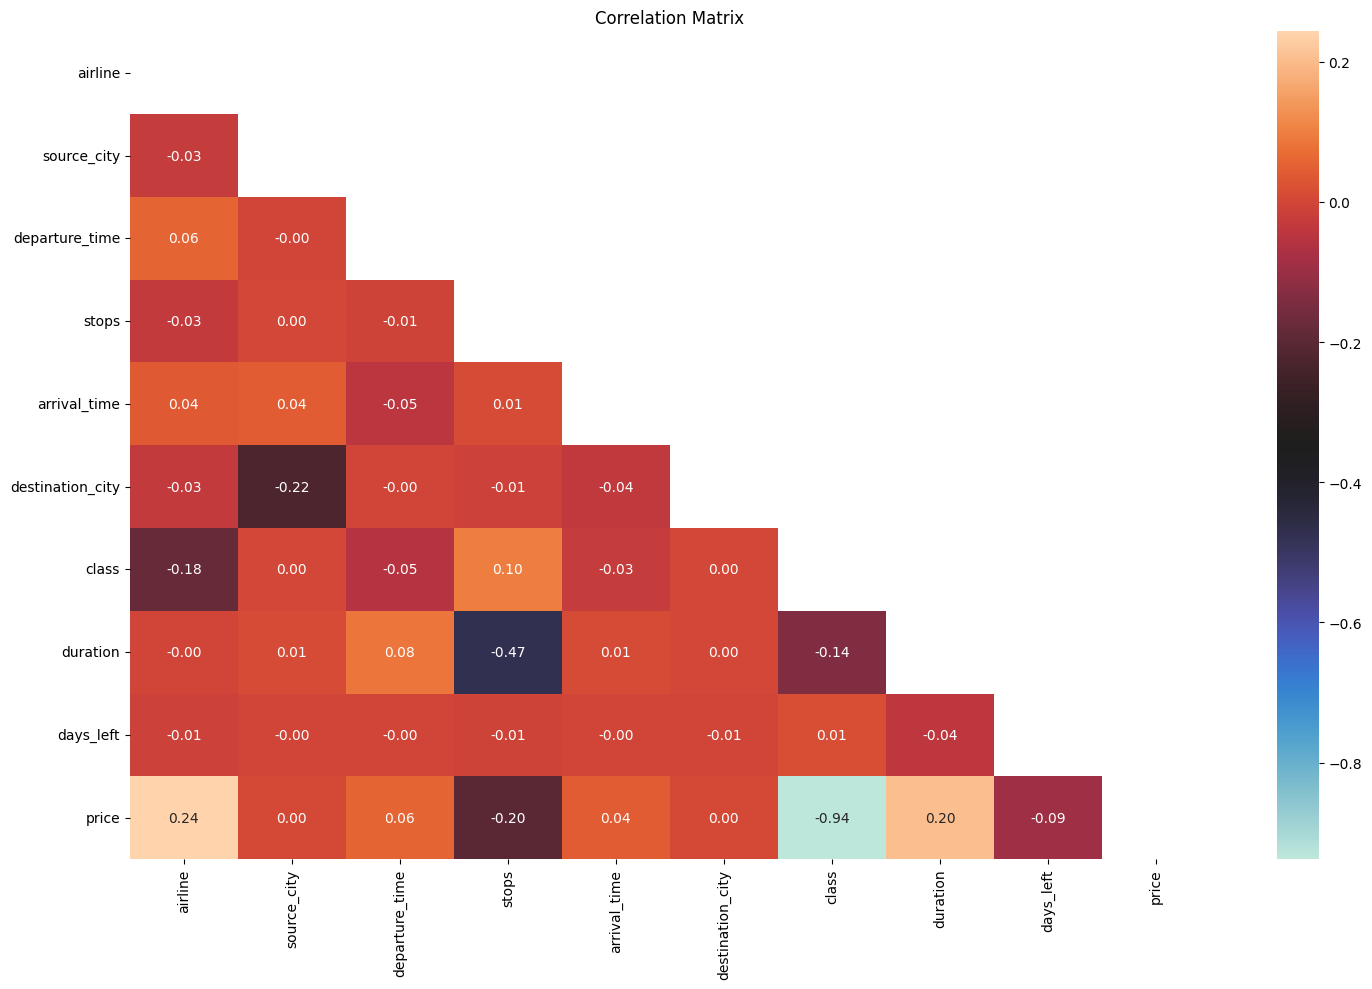

In [35]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Outliers Detection and Treatment

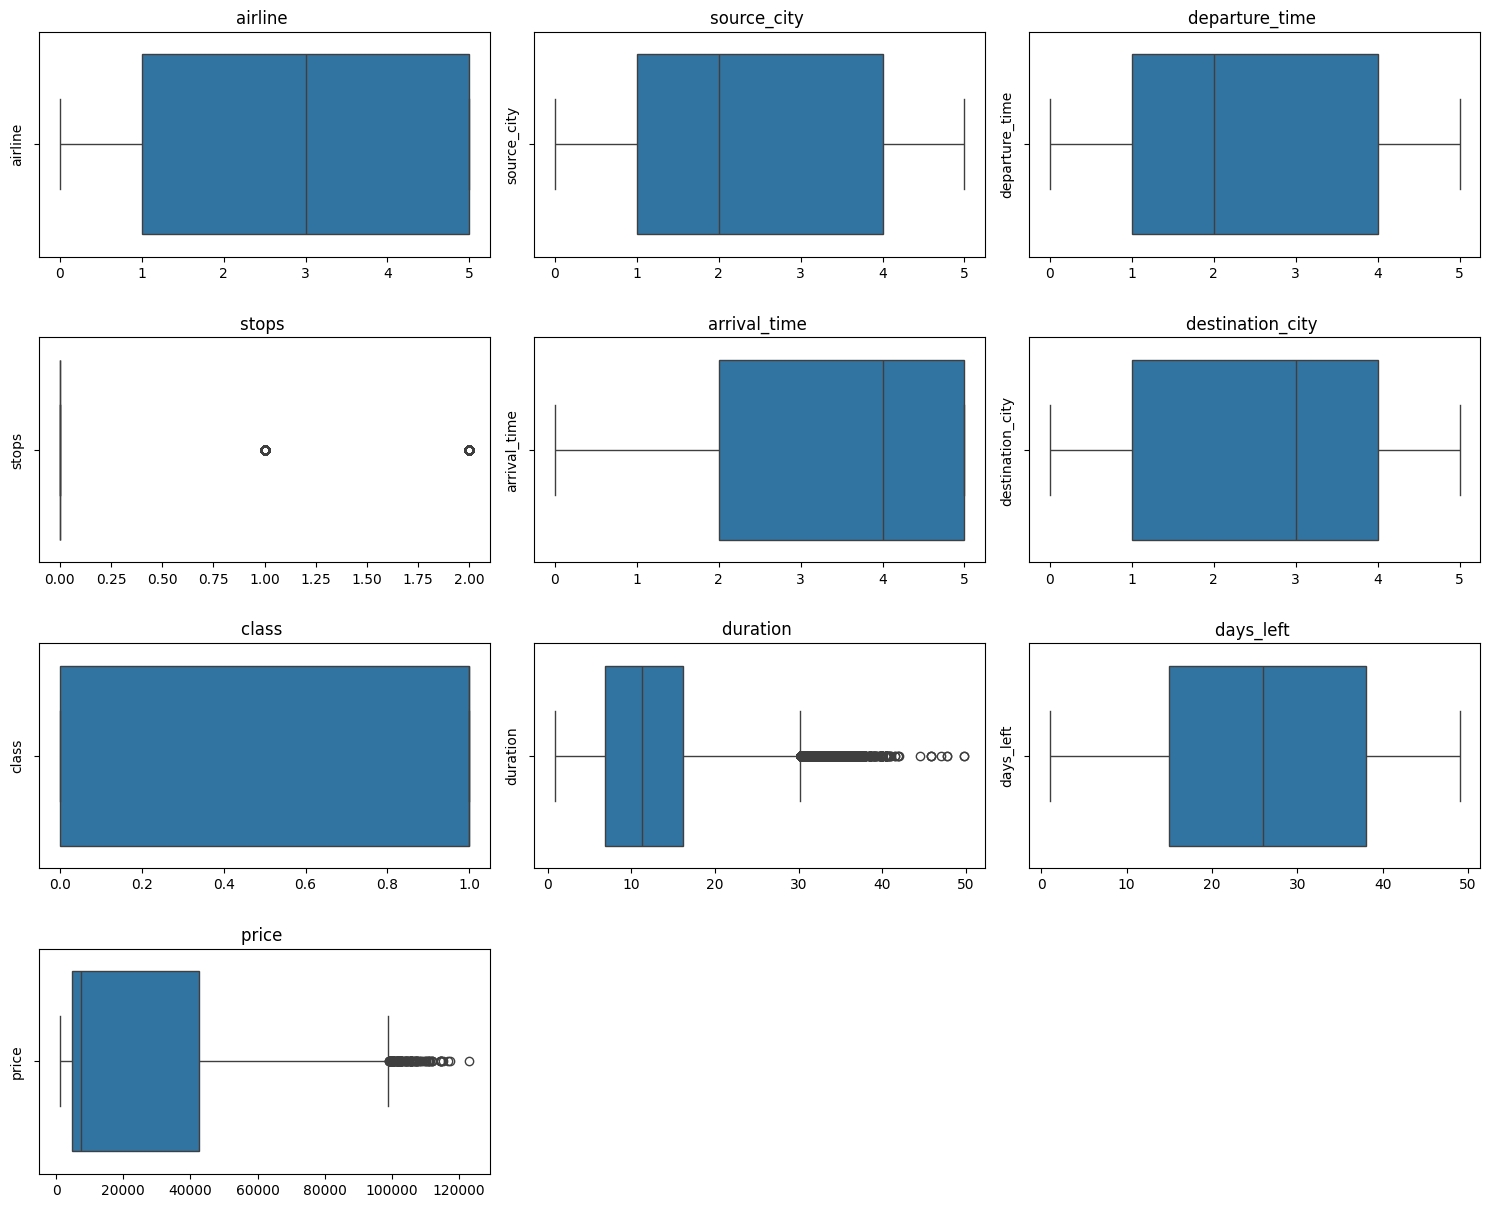

In [36]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [37]:
q1 = df["duration"].quantile(0.25)
q3 = df["duration"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["duration"] < upper_limit) & (df["duration"] > lower_limit)]

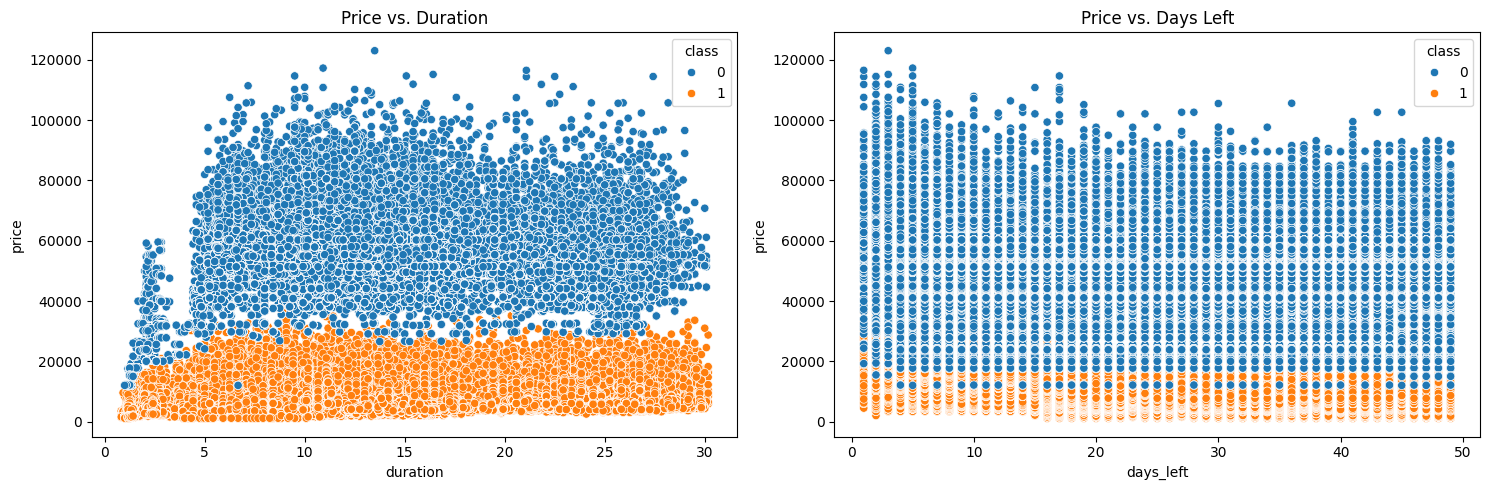

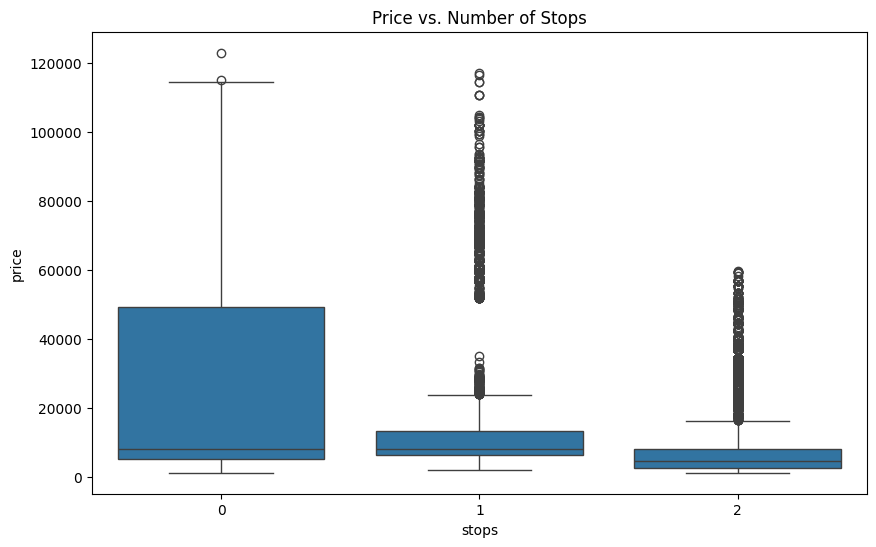

In [45]:
# Scatter plots to visualize relationships between continuous variables and price
plt.figure(figsize=(15, 5))

# Price vs. Duration
plt.subplot(1, 2, 1)
sns.scatterplot(x='duration', y='price', data=df, hue='class')
plt.title('Price vs. Duration')

# Price vs. Days Left
plt.subplot(1, 2, 2)
sns.scatterplot(x='days_left', y='price', data=df, hue='class')
plt.title('Price vs. Days Left')
plt.tight_layout()
plt.show()

# Boxplot of Price vs. Stops
plt.figure(figsize=(10, 6))
sns.boxplot(x='stops', y='price', data=df)
plt.title('Price vs. Number of Stops')
plt.show()

Train Test Split

In [38]:
X = df.drop("price", axis=1)
y = df["price"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((238434, 9), (238434,), (59609, 9), (59609,))

Model Building

--- Linear Regression Model Evaluation ---
MAE: 4637.010119704483
R2-score: 90.5 %
----------------------------------------


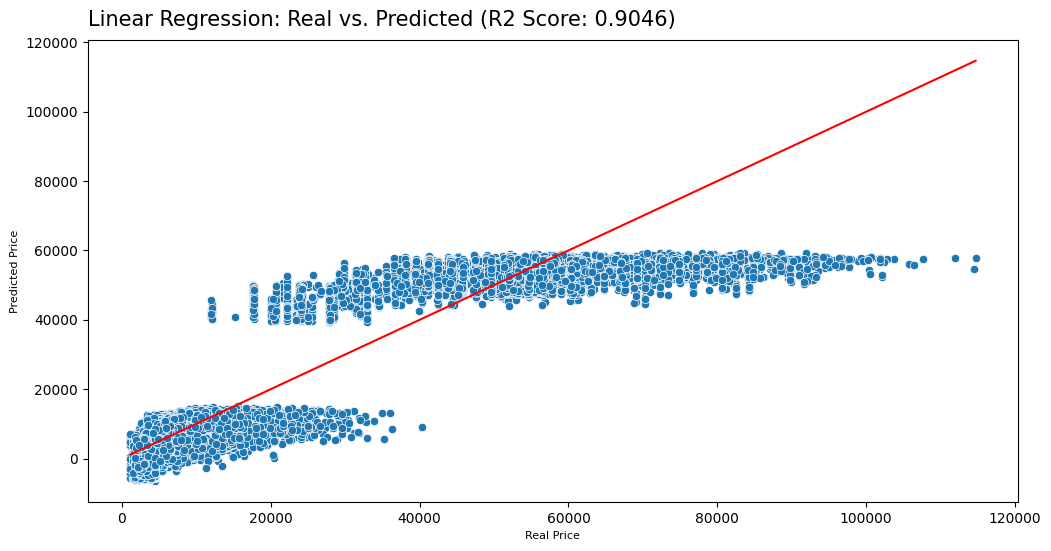

In [46]:
# Create and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg.predict(x_test)

# Evaluate the Linear Regression model
print("--- Linear Regression Model Evaluation ---")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("R2-score:", f"{(r2_score(y_test, y_pred_linear) * 100):0.1f}", "%")
print("----------------------------------------")

# Plotting the Linear Regression predictions
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax.set_title(f"Linear Regression: Real vs. Predicted (R2 Score: {r2_score(y_test, y_pred_linear):.4f})", fontsize=15, pad=10, loc='left')
ax.set_xlabel("Real Price", fontsize=8)
ax.set_ylabel("Predicted Price", fontsize=8)
plt.show()

--- Linear Regression Model Evaluation ---
Mean Absolute Error (MAE): 4637.0101
Mean Squared Error (MSE): 49144639.3932
Root Mean Squared Error (RMSE): 7010.3238
R-squared (R2) Score: 0.9046
------------------------------------------


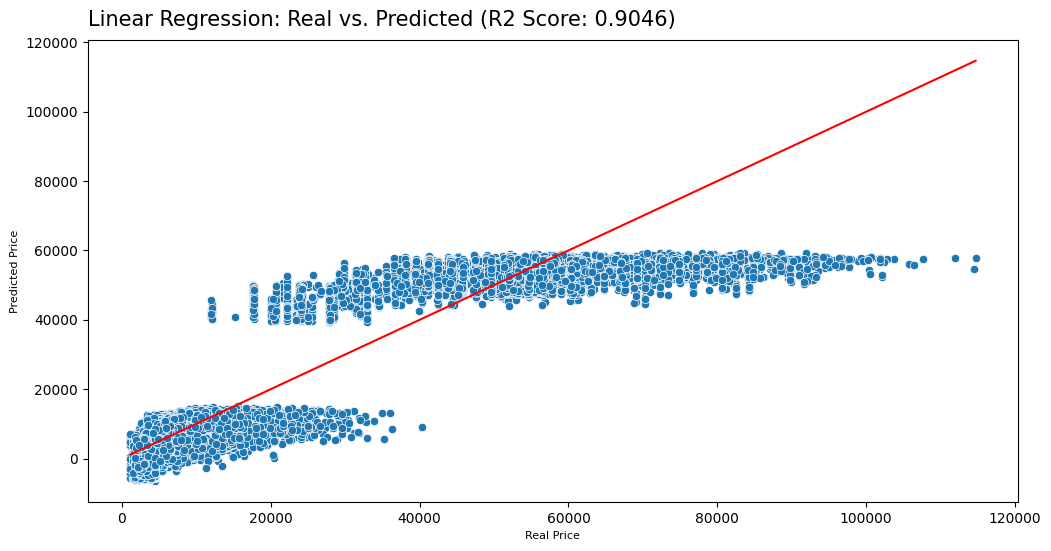

In [54]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming these variables are already defined from your training and prediction steps
# x_test, y_test
# linear_reg = LinearRegression()
# linear_reg.fit(x_train, y_train)
# y_pred_linear = linear_reg.predict(x_test)

# Make predictions on the test set
y_pred_linear = linear_reg.predict(x_test)

# --- Regression Model Evaluation Metrics ---
print("--- Linear Regression Model Evaluation ---")

# Mean Absolute Error (MAE)
# MAE measures the average absolute difference between the predicted and actual values.
mae = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
# MSE gives a higher penalty to larger errors.
mse = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE and is in the same units as the price.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-squared (R2) Score
# R2 indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
r2 = r2_score(y_test, y_pred_linear)
print(f"R-squared (R2) Score: {r2:.4f}")

print("------------------------------------------")

# Optional: Plotting the predictions for visual evaluation
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax.set_title(f"Linear Regression: Real vs. Predicted (R2 Score: {r2:.4f})", fontsize=15, pad=10, loc='left')
ax.set_xlabel("Real Price", fontsize=8)
ax.set_ylabel("Predicted Price", fontsize=8)
plt.show()

In [40]:
reg = RandomForestRegressor(random_state=42)
reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = reg.predict(x_test)

Evaluation

In [42]:
print("MAE: ", mean_absolute_error(y_test, y_pred))

MAE:  1076.6305771054467


In [43]:
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  98.5 %


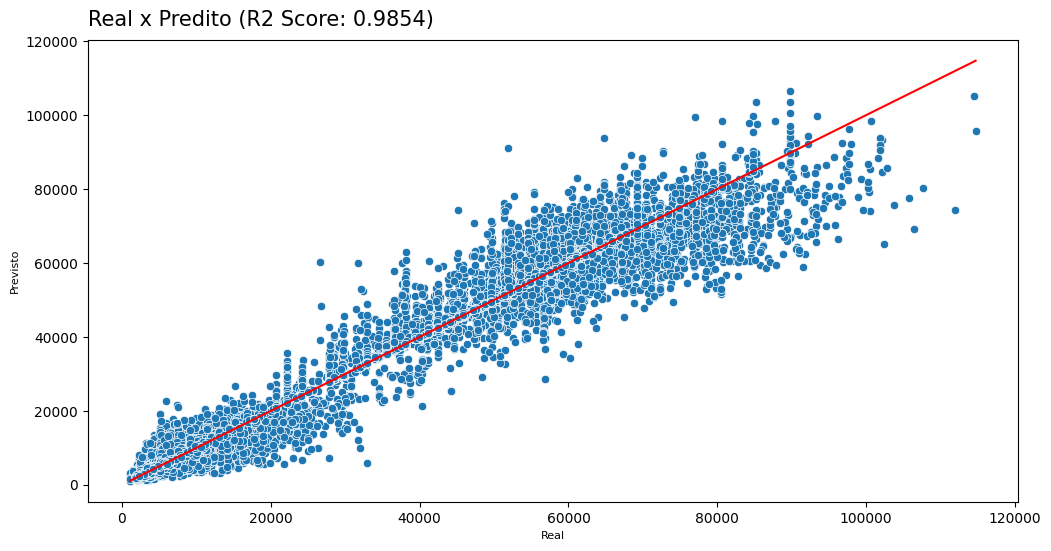

In [44]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
ax.set_title(f"Real x Predito (R2 Score: {r2_score(y_test, y_pred):.4f})", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Real", fontsize = 8)
ax.set_ylabel("Previsto", fontsize = 8)
plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are your true and predicted values
# For example, from your Linear Regression model:
# y_pred = linear_reg.predict(x_test)

print("--- Regression Model Evaluation Metrics ---")

# Mean Absolute Error (MAE)
# MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
# MSE is the average of the squared differences between the predicted and actual values.
# It gives more weight to larger errors.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
# RMSE is the square root of the MSE and is in the same units as the target variable.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-squared (R2) Score
# R2 score measures the proportion of the variance in the dependent variable
# that is predictable from the independent variables. A value closer to 1 is better.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")

print("------------------------------------------")

--- Regression Model Evaluation Metrics ---
Mean Absolute Error (MAE): 1076.6306
Mean Squared Error (MSE): 7496685.3936
Root Mean Squared Error (RMSE): 2738.0076
R-squared (R2) Score: 0.9854
------------------------------------------


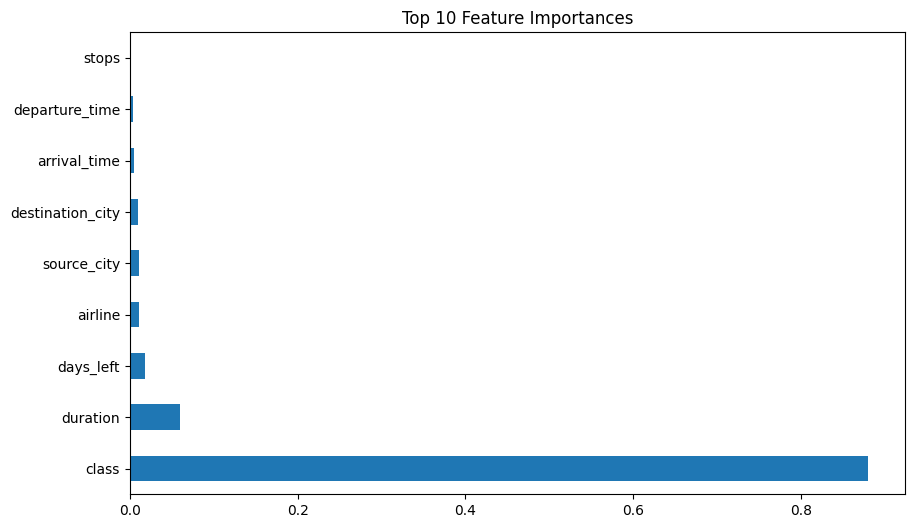

In [48]:
feature_importances = pd.Series(reg.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()